# Image grayscale histogram and histogram transformations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [2]:
def calculer_histogramme(image):
    histogramme = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        histogramme[pixel] += 1
    return histogramme

def etirer_histogramme(image, nouv_min=0, nouv_max=255):
    min_original = np.min(image)
    max_original = np.max(image)
    image_etiree = (image - min_original) * (nouv_max - nouv_min) / (max_original - min_original) + nouv_min
    return np.round(image_etiree).astype(np.uint8)

def egaliser_histogramme(image):
    histogramme = calculer_histogramme(image)
    cdf = np.cumsum(histogramme)
    cdf_min = np.min(cdf)
    image_egalisee = ((cdf[image] - cdf_min) / (np.prod(image.shape) - cdf_min) * 255).astype(np.uint8)
    return image_egalisee

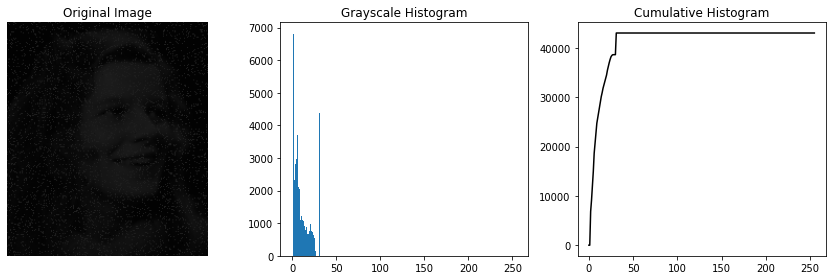

In [6]:
image = np.array(Image.open('img/histo_imageTest_entree_3D.png').convert('L'))
image_to_show = cv2.imread('img/histo_imageTest_entree_3D.png')
image_to_show = cv2.cvtColor(image_to_show, cv2.COLOR_BGR2RGB)

histogram = np.histogram(image, bins=256, range=(0, 256))[0]

cumulative_histogram = np.cumsum(histogram)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_to_show)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), histogram, width=1.0)
plt.title("Grayscale Histogram")

plt.subplot(1, 3, 3)
plt.plot(cumulative_histogram, color='black')
plt.title("Cumulative Histogram")

plt.tight_layout()
plt.show()

In [9]:
min_pixel_value = np.min(image)
max_pixel_value = np.max(image)
stretched_image = ((image - min_pixel_value) / (max_pixel_value - min_pixel_value) * 255).astype(np.uint8)

stretched_histogram = np.histogram(stretched_image, bins=256, range=(0, 256))[0]

stretched_cumulative_histogram = np.cumsum(stretched_histogram)

equalized_image = cv2.equalizeHist(image)

equalized_histogram = np.histogram(equalized_image, bins=256, range=(0, 256))[0]

equalized_cumulative_histogram = np.cumsum(equalized_histogram)

image = Image.fromarray(stretched_image.astype('uint8'))
image.save('img/stretched_image.png')

image = Image.fromarray(equalized_image.astype('uint8'))
image.save('img/equalized_image.png')

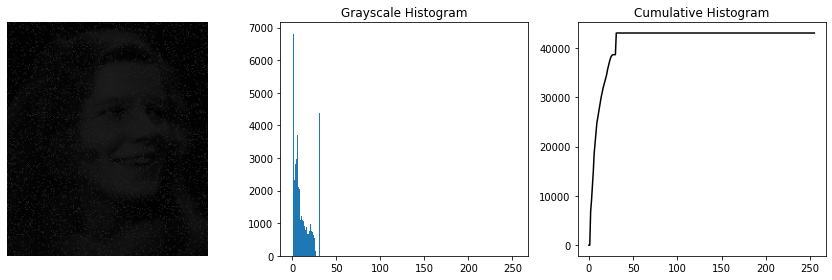

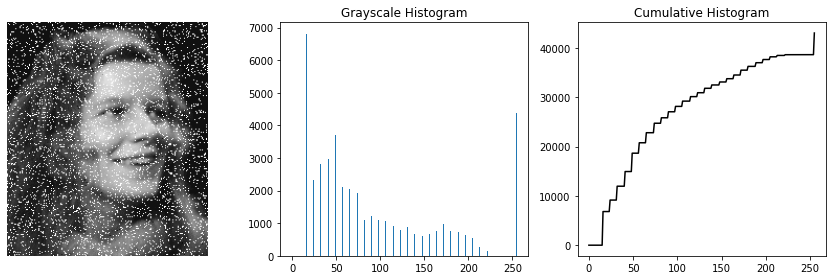

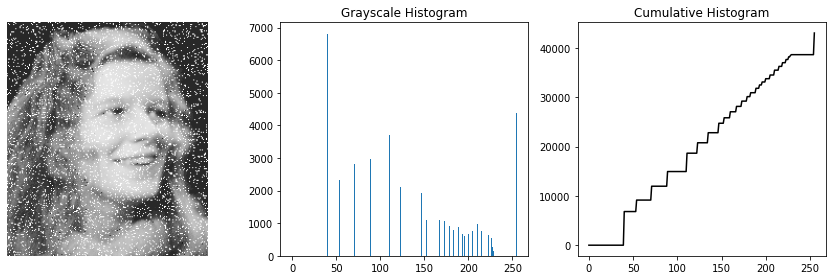

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_to_show)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), histogram, width=1.0)
plt.title("Grayscale Histogram")

plt.subplot(1, 3, 3)
plt.plot(cumulative_histogram, color='black')
plt.title("Cumulative Histogram")

plt.tight_layout()
plt.savefig('img/1_plot_original.jpg')
plt.show()

stretched_image_to_show = cv2.imread('img/stretched_image.png')
stretched_image_to_show = cv2.cvtColor(stretched_image_to_show, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(stretched_image_to_show)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), stretched_histogram, width=1.0)
plt.title("Grayscale Histogram")

plt.subplot(1, 3, 3)
plt.plot(stretched_cumulative_histogram, color='black')
plt.title("Cumulative Histogram")

plt.tight_layout()
plt.savefig('img/1_plot_stretched.jpg')
plt.show()


equalized_image_to_show = cv2.imread('img/equalized_image.png')
equalized_image_to_show = cv2.cvtColor(equalized_image_to_show, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(equalized_image_to_show)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), equalized_histogram, width=1.0)
plt.title("Grayscale Histogram")

plt.subplot(1, 3, 3)
plt.plot(equalized_cumulative_histogram, color='black')
plt.title("Cumulative Histogram")

plt.tight_layout()
plt.savefig('img/1_plot_equalized.jpg')
plt.show()